https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

**Mod A:**

Preprocessing

Imputation

Clustering

EDA

Regression

**Mod B:**

MLP

AutoEncoder

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pylab import rcParams
import plotly.graph_objects as go
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import scipy
from kmodes.kprototypes import KPrototypes

# Pre Processing

In [88]:
df = pd.read_csv('datasets/heart_cdc.csv')

In [89]:
df.shape

(401958, 279)

In [4]:
df.head()

,_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,_psu,ctelenm1,...,_rfpsa23,_clnscpy,_sgmscpy,_sgms10y,_rfblds4,_stoldna,_vircoln,_sbontim,_crcrec1,_aidtst4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [3]:
# Define a dictionary for column renaming
columns_name_mapping = {
    "cvdcrhd4": "HeartDisease",
    "weight2": "BMI1", 
    "height3":"BMI2", 
    "_smoker3":"Smoking", 
    "drnkany5":"AlcoholDrinking", 
    "cvdstrk3":"Stroke", 
    "physhlth":"PhysicalHealth",
    "menthlth":"MentalHealth", 
    "diffwalk":"DiffWalking", 
    "_sex":"Sex", 
    "_ageg5yr":"AgeCategory", 
    "_race":"Race", 
    "diabete4":"Diabetic", 
    "exerany2":"PhysicalActivity", 
    "genhlth":"GenHealth", 
    "sleptim1":"SleepTime", 
    "_asthms1":"Asthma", 
    "chckdny2":"KidneyDisease", 
    "chcscncr":"SkinCancer",
    "_bmi5":"BMI_calc"
}

# Define a list of the columns you want to keep
columns_to_keep = [ 
    "HeartDisease",
    "BMI1", 
    "BMI2", 
    "Smoking", 
    "AlcoholDrinking", 
    "Stroke", 
    "PhysicalHealth",
    "MentalHealth", 
    "DiffWalking", 
    "Sex", 
    "AgeCategory", 
    "Race", 
    "Diabetic", 
    "PhysicalActivity", 
    "GenHealth", 
    "SleepTime", 
    "Asthma", 
    "KidneyDisease", 
    "SkinCancer",
    "BMI_calc"
]

# Rename columns and select the columns to keep in one step
df = df.rename(columns=columns_name_mapping)[columns_to_keep]

In [6]:
df.head()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,2.0,106.0,507.0,1,2,2.0,3.0,30.0,2.0,2,8,1.0,1.0,1.0,2.0,5.0,1,2.0,1.0,1660.0
1,2.0,170.0,504.0,9,9,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,2,2.0,2.0,2918.0
2,2.0,7777.0,508.0,4,2,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,3,2.0,2.0,NaN
3,2.0,9999.0,9999.0,4,2,2.0,88.0,88.0,2.0,2,13,1.0,3.0,2.0,1.0,6.0,3,2.0,2.0,NaN
4,2.0,126.0,506.0,4,2,1.0,88.0,88.0,2.0,2,13,1.0,3.0,1.0,2.0,7.0,3,2.0,2.0,2034.0


In [82]:
value_mapping = {
    'HeartDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'AlcoholDrinking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Stroke': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'PhysicalActivity': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'DiffWalking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'SkinCancer': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'KidneyDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Asthma': {1:'Current', 2:'Former', 3:'Never', 9:'Not Clear'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 4:'Never', 9:'Not Clear'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80+', 14:'Not Clear'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic', 9:'Not Clear'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 3:'No', 4:'Border Line', 7:'Not Clear', 9:'Refused'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 7:'Not Clear', 9:'Refused'},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [7]:
df.isna().any()

HeartDisease         True
BMI1                 True
BMI2                 True
Smoking             False
AlcoholDrinking     False
Stroke               True
PhysicalHealth       True
MentalHealth         True
DiffWalking          True
Sex                 False
AgeCategory         False
Race                 True
Diabetic             True
PhysicalActivity     True
GenHealth            True
SleepTime            True
Asthma              False
KidneyDisease        True
SkinCancer           True
BMI_calc             True
dtype: bool

<Figure size 1600x800 with 0 Axes>

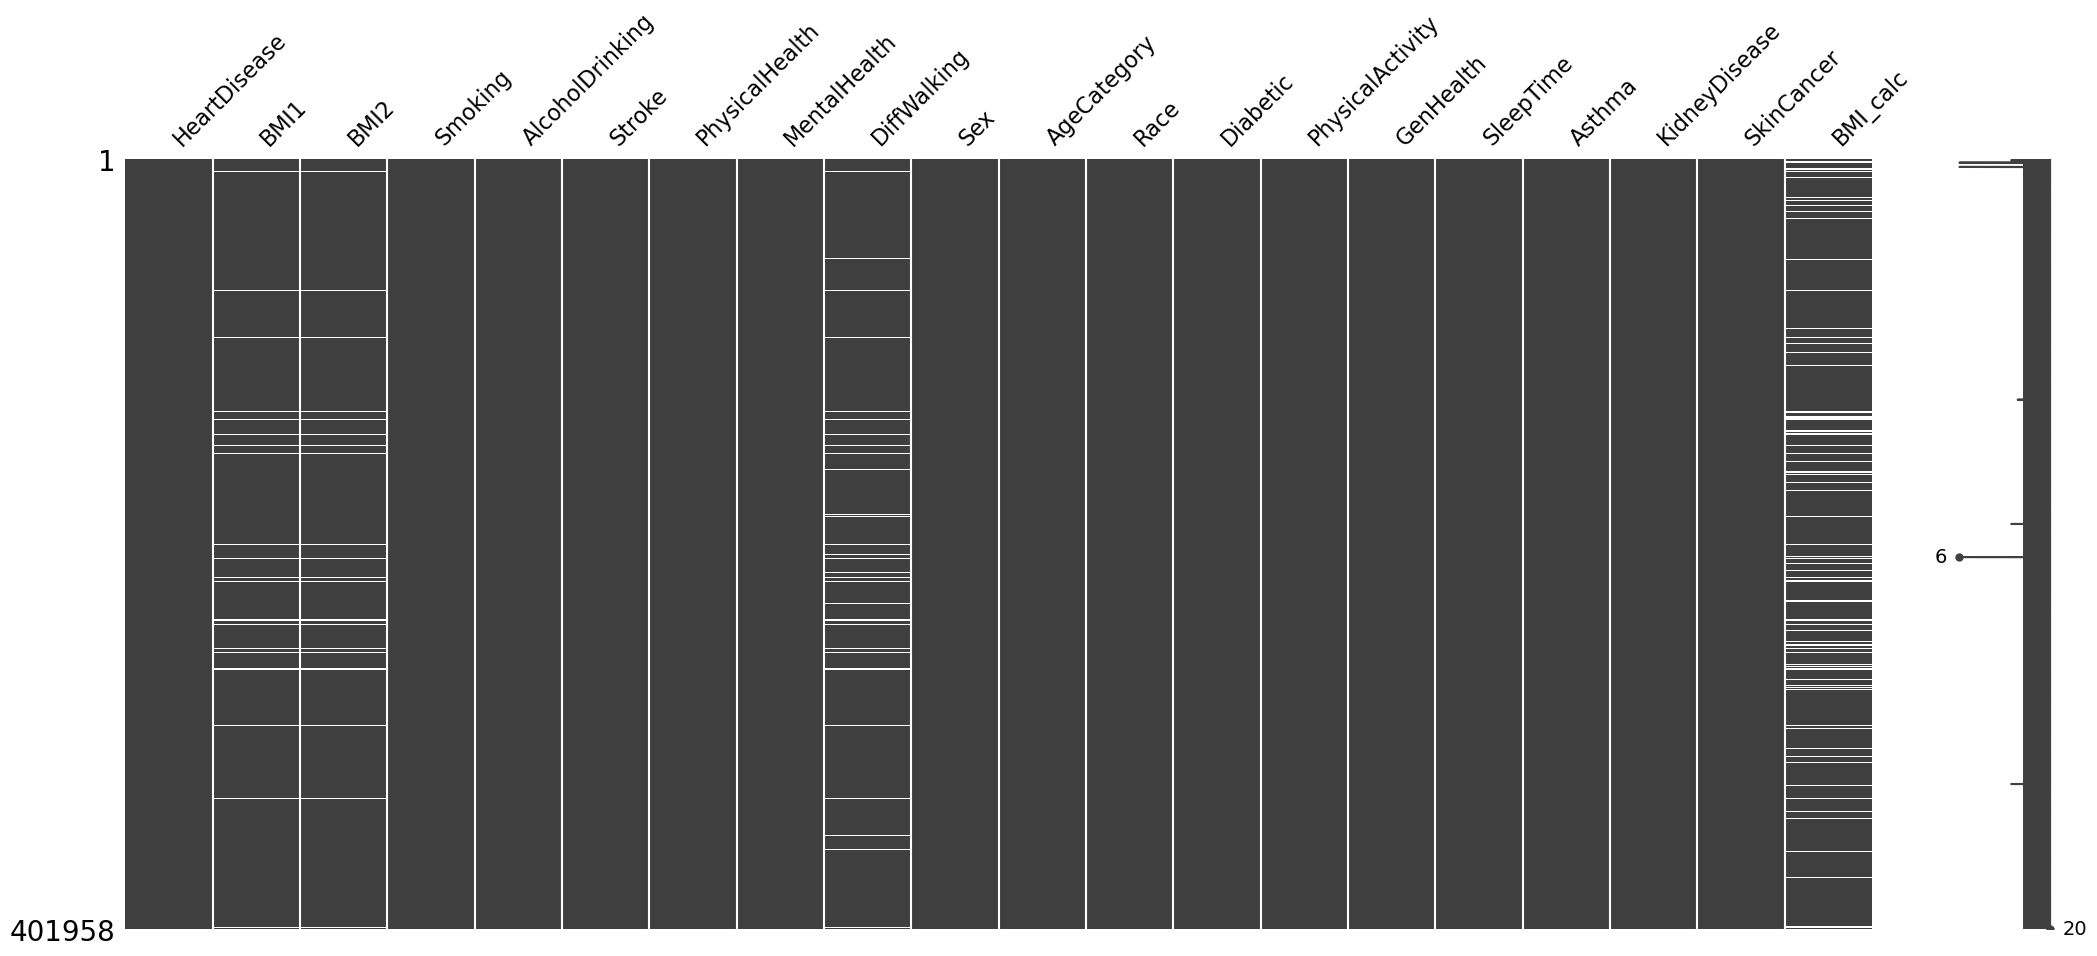

<Figure size 1600x800 with 0 Axes>

In [8]:
msno.matrix(df)
plt.figure(figsize = (16,8))

In [9]:
print(df.isna().sum())

HeartDisease            3
BMI1                 9852
BMI2                10824
Smoking                 0
AlcoholDrinking         0
Stroke                  3
PhysicalHealth          5
MentalHealth            5
DiffWalking         15280
Sex                     0
AgeCategory             0
Race                    1
Diabetic                6
PhysicalActivity        3
GenHealth               8
SleepTime               3
Asthma                  0
KidneyDisease           6
SkinCancer              3
BMI_calc            41357
dtype: int64


# Preprocessing 2

In [17]:
df = pd.read_csv('datasets/heart_cdc.csv')

In [18]:
# Define a dictionary for column renaming
columns_name_mapping = {
    "cvdcrhd4": "HeartDisease",
    "weight2": "Weight", 
    "height3":"Height", 
    "_smoker3":"Smoking", 
    "drnkany5":"AlcoholDrinking", 
    "cvdstrk3":"Stroke", 
    "physhlth":"PhysicalHealth",
    "menthlth":"MentalHealth", 
    "diffwalk":"DiffWalking", 
    "_sex":"Sex", 
    "_ageg5yr":"AgeCategory", 
    "_race":"Race", 
    "diabete4":"Diabetic", 
    "exerany2":"PhysicalActivity", 
    "genhlth":"GenHealth", 
    "sleptim1":"SleepTime", 
    "_asthms1":"Asthma", 
    "chckdny2":"KidneyDisease", 
    "chcscncr":"SkinCancer",
    "_bmi5":"BMI_calc"
}

# Define a list of the columns you want to keep
columns_to_keep = [ 
    "HeartDisease",
    "Weight", 
    "Height", 
    "Smoking", 
    "AlcoholDrinking", 
    "Stroke", 
    "PhysicalHealth",
    "MentalHealth", 
    "DiffWalking", 
    "Sex", 
    "AgeCategory", 
    "Race", 
    "Diabetic", 
    "PhysicalActivity", 
    "GenHealth", 
    "SleepTime", 
    "Asthma", 
    "KidneyDisease", 
    "SkinCancer",
    "BMI_calc"
]

# Rename columns and select the columns to keep in one step
df = df.rename(columns=columns_name_mapping)[columns_to_keep]

In [19]:
value_mapping = {
    'HeartDisease': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'Weight': {7777:np.nan, 9999:np.nan},
    'Height': {7777:np.nan, 9999:np.nan},
    'AlcoholDrinking': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'Stroke': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'PhysicalActivity': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'DiffWalking': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'SkinCancer': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'KidneyDisease': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'Asthma': {1:1, 2:2, 3:0, 9:np.nan},
    'Smoking': {1:1, 2:2, 3:3, 4:0, 9:np.nan},
    'AgeCategory': {14:np.nan},
    'Race': {9:np.nan},
    'Diabetic': {1:1, 2:2, 3:0, 4:0, 7:np.nan, 9:np.nan},
    'GenHealth': {1:1, 2:2, 3:3, 4:4, 5:5, 7:np.nan, 9:np.nan},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [5]:
value_mapping = {
    'HeartDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'AlcoholDrinking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Stroke': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'PhysicalActivity': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'DiffWalking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'SkinCancer': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'KidneyDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Asthma': {1:'Current', 2:'Former', 3:'Never', 9:'Not Clear'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 4:'Never', 9:'Not Clear'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80+', 14:'Not Clear'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic', 9:'Not Clear'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 3:'No', 4:'Border Line', 7:'Not Clear', 9:'Refused'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 7:'Not Clear', 9:'Refused'},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [20]:
df.head()

,HeartDisease,Weight,Height,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,0.0,106.0,507.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,1660.0
1,0.0,170.0,504.0,NaN,NaN,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,2918.0
2,0.0,NaN,508.0,0.0,0.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,NaN
3,0.0,NaN,NaN,0.0,0.0,0.0,88.0,88.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,NaN
4,0.0,126.0,506.0,0.0,0.0,1.0,88.0,88.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,2034.0


Description Weight2: About how much do you weigh without shoes?

Description Height3: About how tall are you without shoes?

weight in pounds

height_in_meters = height_in_inches / 12 * 0.0254

BMI = weight_in_pounds / (height_in_meters ** 2)

In [21]:
df['BMI'] = np.nan
for i in range(len(df['Height'])):
        if not pd.isna(df['Height'].iloc[i]) and not pd.isna(df['Weight'].iloc[i]):
                height_str = str(df['Height'].iloc[i])
                height_inches = int(height_str[0]) * 12 + int(height_str[1:3])
                df['BMI'].iloc[i] = df['Weight'].iloc[i] / (height_inches ** 2) * 703
                
df = df.drop(['Weight', 'Height', 'BMI_calc'], axis=1)

/var/folders/kg/fftk_3yx6318lz6j3g83d5p80000gq/T/ipykernel_1563/3457225251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'].iloc[i] = df['Weight'].iloc[i] / (height_inches ** 2) * 703


In [22]:
df.head(20)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.600134
1,0.0,NaN,NaN,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,29.177246
2,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,1.0,88.0,88.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,20.334711
5,0.0,3.0,0.0,0.0,20.0,30.0,0.0,1,10.0,1.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,26.578450
6,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,12.0,1.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,24.207989
7,0.0,1.0,NaN,0.0,15.0,10.0,0.0,2,10.0,2.0,1.0,1.0,4.0,6.0,0.0,0.0,0.0,26.568405
8,0.0,0.0,0.0,0.0,28.0,88.0,1.0,2,5.0,1.0,0.0,1.0,2.0,8.0,0.0,0.0,0.0,23.707598
9,1.0,3.0,0.0,0.0,6.0,88.0,1.0,2,12.0,2.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,28.871000


# Imputation by DecisionTree

In [5]:
value_mapping = {
    'HeartDisease': {1:1, 2:2, 7:3, 9:4},
    'AlcoholDrinking': {1:1, 2:2, 7:3, 9:4},
    'Stroke': {1:1, 2:2, 7:3, 9:4},
    'PhysicalActivity': {1:1, 2:2, 7:3, 9:4},
    'DiffWalking': {1:1, 2:2, 7:3, 9:4},
    'SkinCancer': {1:1, 2:2, 7:3, 9:4},
    'KidneyDisease': {1:1, 2:2, 7:3, 9:4},
    'Asthma': {1:1, 2:2, 3:3, 9:4},
    'Smoking': {1:1, 2:2, 3:3, 4:4, 9:5},
    'Diabetic': {1:1, 2:2, 3:3, 4:4, 7:5, 9:6},
    'GenHealth': {1:1, 2:2, 3:3, 4:4, 5:5, 7:6, 9:7},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [15]:
value_mapping = {
    'HeartDisease': {1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'},
    'AlcoholDrinking': {1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'},
    'Stroke': {1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'},
    'PhysicalActivity': {1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'},
    'DiffWalking': {1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'},
    'SkinCancer': {1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'},
    'KidneyDisease': {1:'Yes', 2:'No', 3:'Not Clear', 4:'Refused'},
    'Asthma': {1:'Current', 2:'Former', 3:'Never', 4:'Not Clear'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 4:'Never', 5:'Not Clear'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80 and More', 14:'Not Clear'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic', 9:'Not Clear'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 3:'No', 4:'Border Line', 5:'Not Clear', 6:'Refused'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 6:'Not Clear', 7:'Refused'},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [23]:
cat_var = ['HeartDisease', 'AlcoholDrinking', 'Stroke', 'Smoking', 'PhysicalActivity', 'DiffWalking', 'SkinCancer', 'Asthma', 'KidneyDisease', 'Race', 'Diabetic', 'GenHealth', 'AgeCategory']

In [24]:
def categorical_imputer(df, column_name: str):
    var_known = df.dropna(subset=[column_name])
    var_missing = df[df[column_name].isna()]
    
    X_known = var_known.drop(columns=[column_name])
    y_known = pd.DataFrame(var_known[column_name])
    
    X_known = X_known.apply(LabelEncoder().fit_transform)
    
    Tree = DecisionTreeClassifier(random_state=0)
    Tree.fit(X_known, y_known)
    
    missed_values = var_missing.drop(columns=[column_name])
    missed_values[column_name] = Tree.predict(missed_values)
    print("Count of NaN's in ", column_name, " were: ", missed_values[column_name].shape[0])
    
    df.loc[var_missing.index, column_name] = missed_values[column_name]
    
    print(column_name, ' has been imputed\n')
    

In [25]:
for variable in cat_var:
    categorical_imputer(df, variable)

Count of NaN's in  HeartDisease  were:  3302
HeartDisease  has been imputed

Count of NaN's in  AlcoholDrinking  were:  26775
AlcoholDrinking  has been imputed

Count of NaN's in  Stroke  were:  1186
Stroke  has been imputed

Count of NaN's in  Smoking  were:  21100
Smoking  has been imputed

Count of NaN's in  PhysicalActivity  were:  682
PhysicalActivity  has been imputed

Count of NaN's in  DiffWalking  were:  16759
DiffWalking  has been imputed

Count of NaN's in  SkinCancer  were:  1275
SkinCancer  has been imputed

Count of NaN's in  Asthma  were:  2927
Asthma  has been imputed

Count of NaN's in  KidneyDisease  were:  1516
KidneyDisease  has been imputed

Count of NaN's in  Race  were:  8988
Race  has been imputed

Count of NaN's in  Diabetic  were:  814
Diabetic  has been imputed

Count of NaN's in  GenHealth  were:  961
GenHealth  has been imputed

Count of NaN's in  AgeCategory  were:  8257
AgeCategory  has been imputed



In [26]:
df.isna().any()

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth       True
MentalHealth         True
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime            True
Asthma              False
KidneyDisease       False
SkinCancer          False
BMI                  True
dtype: bool

In [27]:
num_var = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [28]:
def numerical_imputer(df, column_name: str):
    var_known = df.dropna(subset=[column_name])
    var_missing = df[df[column_name].isna()]
    
    X_known = var_known.drop(columns=[column_name])
    y_known = pd.DataFrame(var_known[column_name])
    
    X_known = X_known.apply(LabelEncoder().fit_transform)
    
    Tree = DecisionTreeRegressor(random_state=0)
    Tree.fit(X_known, y_known)
    
    missed_values = var_missing.drop(columns=[column_name])
    missed_values[column_name] = Tree.predict(missed_values)
    print("Count of NaN's in ", column_name, " were: ", missed_values[column_name].shape[0])
    
    df.loc[var_missing.index, column_name] = missed_values[column_name]
    
    print(column_name, ' has been imputed\n')

In [29]:
for variable in num_var:
    numerical_imputer(df, variable)

Count of NaN's in  BMI  were:  39304
BMI  has been imputed

Count of NaN's in  PhysicalHealth  were:  5
PhysicalHealth  has been imputed

Count of NaN's in  MentalHealth  were:  5
MentalHealth  has been imputed

Count of NaN's in  SleepTime  were:  3
SleepTime  has been imputed



In [30]:
df.isna().any()

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
BMI                 False
dtype: bool

In [31]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column} : {unique_values}")

HeartDisease : 2
Smoking : 4
AlcoholDrinking : 2
Stroke : 2
PhysicalHealth : 33
MentalHealth : 33
DiffWalking : 2
Sex : 2
AgeCategory : 13
Race : 8
Diabetic : 3
PhysicalActivity : 2
GenHealth : 5
SleepTime : 26
Asthma : 3
KidneyDisease : 2
SkinCancer : 2
BMI : 7797


In [37]:
df['BMI'] = df['BMI'].round(2)

In [39]:
imputed_df = df.copy()

In [40]:
imputed_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.60
1,0.0,1.0,1.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,29.18
2,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,31.95
3,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,27.37
4,0.0,0.0,0.0,1.0,88.0,88.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,20.33


In [41]:
imputed_df.to_csv('numerical_data.csv', index=True)

In [42]:
value_mapping = {
    'HeartDisease': {1:'Yes', 0:'No'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 0:'Never'},
    'AlcoholDrinking': {1:'Yes', 0:'No'},
    'Stroke': {1:'Yes', 0:'No'},
    'DiffWalking': {1:'Yes', 2:'No'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80 or More'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 0:'No'},
    'PhysicalActivity': {1:'Yes', 2:'No'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor'},
    'Asthma': {1:'Current', 2:'Former', 0:'Never'},
    'KidneyDisease': {1:'Yes', 0:'No'},
    'SkinCancer': {1:'Yes', 0:'No'},  
}

# Use the replace() method to change the values in the DataFrame
imputed_df.replace(value_mapping, inplace=True)

In [43]:
imputed_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,No,Smoker,No,No,3.0,30.0,0.0,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,16.60
1,No,Smoker,Yes,No,88.0,88.0,0.0,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,29.18
2,No,Never,No,No,88.0,88.0,0.0,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,31.95
3,No,Never,No,No,88.0,88.0,0.0,Female,80 or More,White,No,0.0,Excellent,6.0,Never,No,No,27.37
4,No,Never,No,Yes,88.0,88.0,0.0,Female,80 or More,White,No,Yes,Very Good,7.0,Never,No,No,20.33


In [45]:
imputed_df.to_csv('categorical_data.csv', index=True)

# Clustering

In [1]:
df = pd.read_csv('datasets/heart_imputed_3.csv')

NameError: name 'pd' is not defined

In [6]:
df = df.drop("Unnamed: 0",axis=1)

In [7]:
df.head()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,No,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0
1,No,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,2918.0
2,No,7777.0,508.0,Never,No,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,5448.0
3,No,9999.0,9999.0,Never,No,No,88.0,88.0,No,Female,80 and More,White,No,No,Excellent,6.0,Never,No,No,5472.0
4,No,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,80 and More,White,No,Yes,Very Good,7.0,Never,No,No,2034.0


In [9]:
arrays = df.values

In [8]:
kproto = KPrototypes(n_clusters = 3, max_iter=20)

In [17]:
clusters = kproto.fit_predict(arrays, categorical=[0,3,4,5,8,9,10,11,12,13,14,16,17,18])

In [19]:
clusters

array([2, 2, 1, ..., 2, 2, 2], dtype=uint16)

In [20]:
df['clus'] = clusters

In [21]:
df.head()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc,clus
0,No,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,...,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0,2
1,No,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,...,Black,No,Yes,Good,7.0,Former,No,No,2918.0,2
2,No,7777.0,508.0,Never,No,No,88.0,88.0,No,Female,...,Black,No,Yes,Good,7.0,Never,No,No,5448.0,1
3,No,9999.0,9999.0,Never,No,No,88.0,88.0,No,Female,...,White,No,No,Excellent,6.0,Never,No,No,5472.0,0
4,No,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,...,White,No,Yes,Very Good,7.0,Never,No,No,2034.0,2


In [22]:
print(kproto.cluster_centroids_)

[['5809.409957304056' '9173.065035071668' '70.97674595913388'
  '68.62824031716987' '9.89417505336993' '4459.654772796584' 'No' 'Never'
  'No' 'No' 'No' 'Female' 'Not Clear' 'White' 'No' 'Yes' 'Good' 'Never'
  'No' 'No']
 ['9284.151462433401' '509.85457214309014' '67.02555181037295'
  '63.443024899423726' '8.969772751984342' '5505.1310209851035' 'No'
  'Never' 'No' 'No' 'No' 'Female' '65-69' 'White' 'No' 'Yes' 'Good'
  'Never' 'No' 'No']
 ['180.65255042543083' '519.9703980045782' '65.92901297887963'
  '61.100845462791' '7.825513972271412' '2815.2282560575304' 'No' 'Never'
  'Yes' 'No' 'No' 'Female' '65-69' 'White' 'No' 'Yes' 'Very Good' 'Never'
  'No' 'No']]


In [27]:
df[df['clus'] == 2].head(20)

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc,clus
0,No,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,...,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0,2
1,No,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,...,Black,No,Yes,Good,7.0,Former,No,No,2918.0,2
4,No,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,...,White,No,Yes,Very Good,7.0,Never,No,No,2034.0,2
5,No,180.0,509.0,Former Smoker,No,No,20.0,30.0,No,Male,...,White,Yes,Yes,Fair,8.0,Current,No,No,2658.0,2
6,No,150.0,506.0,Never,No,No,88.0,88.0,No,Female,...,White,No,No,Good,6.0,Never,No,Yes,2421.0,2
7,No,150.0,503.0,Smoker,Refused,No,15.0,10.0,No,Female,...,Black,Yes,Yes,Fair,6.0,Never,No,No,2657.0,2
8,No,170.0,511.0,Never,No,No,28.0,88.0,Yes,Female,...,White,No,Yes,Very Good,8.0,Never,No,No,2371.0,2
9,Yes,163.0,503.0,Former Smoker,No,No,6.0,88.0,Yes,Female,...,Black,No,No,Fair,12.0,Never,No,No,2887.0,2
10,No,134.0,506.0,Never,No,No,15.0,88.0,No,Female,...,White,No,Yes,Fair,4.0,Current,No,Yes,2163.0,2
11,No,162.0,500.0,Former Smoker,No,No,5.0,88.0,Yes,Female,...,White,Yes,No,Good,9.0,Current,No,No,3164.0,2


# KNN IMPUTER

In [ ]:
cat_var = df[['HeartDisease',
    'Stroke',
    'PhysicalActivity',
    'DiffWalking',
    'SkinCancer',
    'KidneyDisease',
    'Race',
    'Diabetic',
    'GenHealth']]

In [13]:
cat_dummies = pd.get_dummies(cat_var, drop_first=True)
cat_dummies.head()

,HeartDisease,Stroke,PhysicalActivity,DiffWalking,SkinCancer,KidneyDisease,Race,Diabetic,GenHealth
0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
3,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0
4,2.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0


In [15]:
scaler = MinMaxScaler()
cat_dummies = pd.DataFrame(scaler.fit_transform(cat_dummies), columns = cat_dummies.columns)

In [16]:
cat_dummies.head()

,HeartDisease,Stroke,PhysicalActivity,DiffWalking,SkinCancer,KidneyDisease,Race,Diabetic,GenHealth
0,0.125,0.125,0.000,0.125,0.000,0.125,0.000,0.00,0.125
1,0.125,0.125,0.000,0.125,0.125,0.125,0.125,0.25,0.250
2,0.125,0.125,0.000,0.125,0.125,0.125,0.125,0.25,0.250
3,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.25,0.000
4,0.125,0.000,0.000,0.125,0.125,0.125,0.000,0.25,0.125


In [17]:
# Specify the number of neighbors (k) to consider
k = 5 

# Create a KNNImputer object with categorical handling strategy
imputer = KNNImputer(n_neighbors=k, weights="uniform", metric="nan_euclidean")
df_imputed = imputer.fit_transform(cat_dummies)

In [20]:
df_imputed = pd.DataFrame(df_imputed, columns = cat_dummies.columns)

In [31]:
df_imputed.isna().any()

HeartDisease        False
Stroke              False
PhysicalActivity    False
DiffWalking         False
SkinCancer          False
KidneyDisease       False
Race                False
Diabetic            False
GenHealth           False
dtype: bool

In [30]:
df_imputed.isna().sum()

HeartDisease        0
Stroke              0
PhysicalActivity    0
DiffWalking         0
SkinCancer          0
KidneyDisease       0
Race                0
Diabetic            0
GenHealth           0
dtype: int64

In [32]:
for column in df_imputed.columns:
    unique_values = len(df_imputed[column].unique())
    print(f"{column} : {unique_values}")

HeartDisease : 5
Stroke : 5
PhysicalActivity : 5
DiffWalking : 20
SkinCancer : 5
KidneyDisease : 4
Race : 10
Diabetic : 7
GenHealth : 11


In [28]:
df_imputed = pd.DataFrame(df_imputed, columns = cat_dummies.columns)

In [35]:
df_imputed.head()

,HeartDisease,Stroke,PhysicalActivity,DiffWalking,SkinCancer,KidneyDisease,Race,Diabetic,GenHealth
0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
3,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0
4,2.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0


In [34]:
for column in df_imputed.columns:
    unique_values = df_imputed[column].unique()
    print(f"{column} : {unique_values}")

HeartDisease : [2.  1.  7.  9.  1.8]
Stroke : [2.  1.  7.  9.  1.8]
PhysicalActivity : [1.  2.  7.  1.2 9. ]
DiffWalking : [2.  1.  1.4 7.  9.  3.2 1.8 1.2 2.8 1.6 2.6 3.  2.4 3.4 2.2 4.8 6.2 3.8
 4.4 7.6]
SkinCancer : [1.  2.  7.  9.  1.8]
KidneyDisease : [2. 1. 7. 9.]
Race : [1.  2.  9.  4.  3.  7.  8.  6.  5.  1.4]
Diabetic : [1.  3.  4.  2.  2.6 7.  9. ]
GenHealth : [2.  3.  1.  4.  5.  7.  9.  2.8 1.2 3.4 2.6]


In [48]:
num_var = df.drop(cat_var.columns, axis=1)

In [49]:
num_var = num_var.drop(['Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'Asthma'], axis=1)

In [50]:
num_var.head()

,BMI1,BMI2,PhysicalHealth,MentalHealth,SleepTime,BMI_calc
0,106.0,507.0,3.0,30.0,5.0,1660.0
1,170.0,504.0,88.0,88.0,7.0,2918.0
2,7777.0,508.0,88.0,88.0,7.0,NaN
3,9999.0,9999.0,88.0,88.0,6.0,NaN
4,126.0,506.0,88.0,88.0,7.0,2034.0


In [54]:
scaler = MinMaxScaler()

In [66]:
num_dummies = pd.get_dummies(num_var, drop_first=True)

In [67]:
num_dummies = pd.DataFrame(scaler.fit_transform(num_dummies), columns = num_dummies.columns)

In [68]:
num_dummies.head()

,BMI1,BMI2,PhysicalHealth,MentalHealth,SleepTime,BMI_calc
0,0.005629,0.030934,0.020408,0.295918,0.040816,0.053003
1,0.012062,0.030628,0.887755,0.887755,0.061224,0.198588
2,0.776661,0.031036,0.887755,0.887755,0.061224,NaN
3,1.000000,1.000000,0.887755,0.887755,0.051020,NaN
4,0.007639,0.030832,0.887755,0.887755,0.061224,0.096285


In [69]:
k = 5
imputer = KNNImputer(n_neighbors=k, weights="uniform", metric="nan_euclidean")
df_imputed_num = imputer.fit_transform(num_dummies)

In [72]:
df_imputed_num = pd.DataFrame(df_imputed_num, columns = num_dummies.columns)

In [73]:
df_imputed_num.isna().sum()

BMI1              0
BMI2              0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
BMI_calc          0
dtype: int64

In [74]:
df_imputed_num.head()

,BMI1,BMI2,PhysicalHealth,MentalHealth,SleepTime,BMI_calc
0,0.005629,0.030934,0.020408,0.295918,0.040816,0.053003
1,0.012062,0.030628,0.887755,0.887755,0.061224,0.198588
2,0.776661,0.031036,0.887755,0.887755,0.061224,0.069367
3,1.000000,1.000000,0.887755,0.887755,0.051020,0.424048
4,0.007639,0.030832,0.887755,0.887755,0.061224,0.096285


# Test

In [29]:
df = pd.read_csv('datasets/heart_imputed_3.csv')

In [30]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
for column in df.columns:
    unique_values = len(df3[column].unique())
    print(f"{column} : {unique_values}")

HeartDisease : 4
BMI1 : 574
BMI2 : 147
Smoking : 5
AlcoholDrinking : 4
Stroke : 4
PhysicalHealth : 33
MentalHealth : 33
DiffWalking : 4
Sex : 2
AgeCategory : 14
Race : 9
Diabetic : 6
PhysicalActivity : 4
GenHealth : 7
SleepTime : 26
Asthma : 4
KidneyDisease : 4
SkinCancer : 4
BMI_calc : 3769


In [38]:
df3 = df.copy()
values = pd.unique(df3["HeartDisease"])
for value in values:
    conversion = val_converter(df3, 'HeartDisease', value)
    df3["HeartDisease"].replace(value, conversion, inplace = True)


In [39]:
df3.head()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,None,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0
1,None,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,2918.0
2,None,7777.0,508.0,Never,No,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,5448.0
3,None,9999.0,9999.0,Never,No,No,88.0,88.0,No,Female,80 and More,White,No,No,Excellent,6.0,Never,No,No,5472.0
4,None,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,80 and More,White,No,Yes,Very Good,7.0,Never,No,No,2034.0
